### Linear Regression can be achieved through various methods:

    This is a very simple example of using two scipy tools for linear regression.
    
    Scipy.Polyfit
    Stats.linregress
    Optimize.curve_fit
    numpy.linalg.lstsq
    statsmodels.OLS
    sklearn.linear_model.LinearRegression

####  Importing necessary libraries

In [2]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


    Draw Scatter plot

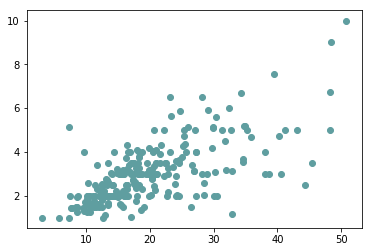

In [10]:
plt.scatter(tips['total_bill'],tips['tip'],c='cadetblue')

plt.show()

### Method: Scipy.Polyfit


In [24]:
t1=time.time()
(ar,br)=polyfit(tips['total_bill'],tips['tip'], 1)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: slope=%.2f intercept=%.2f' % (ar,br))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: slope=0.11 intercept=0.92
Time taken: 0.0 seconds


### Method: Stats.linregress


In [26]:
#Linear regression using stats.linregress
t1=time.time()
(slope,intercept,r_value,p_value,stderr)=stats.linregress(tips['total_bill'],tips['tip'])
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.linregress')
print('slope=%.2f intercept=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (slope,intercept,stderr,r_value))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
slope=0.11 intercept=0.92, std error= 0.007, r^2 coefficient= 0.676
Time taken: 0.0 seconds


### Method: Optimize.curve_fit


In [27]:
def flin(t,a,b):
    result = a*t+b
    return(result)

In [28]:
t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=tips['total_bill'],ydata=tips['tip'],method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=0.11 b=0.92
Time taken: 0.15623855590820312 seconds


### Method: numpy.linalg.lstsq


In [30]:
t1=time.time()
A = np.vstack([tips['total_bill'], np.ones(len(tips['total_bill']))]).T
result = np.linalg.lstsq(A, tips['tip'])
ar,br = result[0]
err = np.sqrt(result[1]/len(tips['tip']))
t2=time.time()
t_linalg_lstsq = float(t2-t1)

print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_linalg_lstsq))

Linear regression using numpy.linalg.lstsq
parameters: a=0.11 b=0.92, ms error= 1.018
Time taken: 0.03125166893005371 seconds


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until



### Method: Statsmodels.OLS


In [34]:
t1=time.time()
X = tips['total_bill']
y = tips['tip']
X = sm.add_constant(X)

est = sm.OLS(y, X)
est2 = est.fit()
ar=est2.params[1]
br=est2.params[0]
t2=time.time()
t_OLS = float(t2-t1)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)
print ("Summary: \n", est2.summary())
print("Time taken: {} seconds".format(t_OLS))

Linear regression using statsmodels.OLS
parameters: a=0.11 b=0.92
pvalues
 const         2.526443e-08
total_bill    6.692471e-34
dtype: float64
tvalues
 const          5.761236
total_bill    14.260355
dtype: float64
rsquared
 0.45661658635167646
rsquared_adj
 0.4543712003448651
Summary: 
                             OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 30 May 2020   Prob (F-statistic):           6.69e-34
Time:                        16:22:48   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         

### Method: sklearn.linear_model.LinearRegression

In [57]:
t1=time.time()
lm = LinearRegression()
lm.fit(X = tips['total_bill'].values.reshape(-1,1),y = tips['tip'])
ar=lm.coef_[0]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear))

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=0.11 b=0.92
Time taken: 0.0 seconds
